# Capstone Project - Collisions in Seattel
### Applied Data Science Capstone by IBM/Coursera

#### By Sanoj Chathuranga Amarasiri

## Table of contents
* [Introduction](#introduction)
* [Data](#dataset)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>


In 2019, an estimated **38,800 people lost their lives to car crashes**, in 2018 **39,404 deaths** and in 2017 **40,231 deaths**. About **4.4 million people were injured seriously** enough to require medical attention in crashes last year. Thousands of lives and millions of dollars lost due to accidents and collations per year. This makes travelling risky and unsafe. But if we could identify the factors that tolerate collisions to occur, we can prevent them from occurring or at least reduce them.

In this project we'll study the relation between cloitions and facters associated with those collisions. Specifically, this report will be targeted to residents and drivers in **Seattel area in USA**.

We will use our data science powers to generate a few most effecting factors based on this criteria.


## Data Set <a name="dataset"></a>

Based on definition of our problem, environmantal factors that will influence our decission are:

* Locations of collisions occured
* Junction type
* Weather
* Road condition
* Light condition

Aprat form the environtal factors, following human factors will also considered:

* Inattention of the driver
* Drugs

We'll study above factors correlated with collisions. 

## Methodology<a name="methodology"></a>

### Download data set

In [4]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-05 13:15:42--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  43.2MB/s   in 1.6s   

2020-09-05 13:15:44 (43.2 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



Install & import necessory libraries

In [5]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                       

### Data Preparation

In [6]:
import folium
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [7]:
df = pd.read_csv("Data-Collisions.csv")
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [8]:
df.shape

(194673, 38)

In [9]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

Selected location, junction type, in attention, drug use, weather, road condition, light condition, speeding as independent variables and severnity as dependent variable.

In [10]:
df['SEVERITYDESC'].unique()

array(['Injury Collision', 'Property Damage Only Collision'], dtype=object)

Only two uneque values are present in dependent variable

Now let's create a seperate data frame with selected vriable and prepare then for analysis.
   * Remove null value raws
   * Balance data
   * Rename X,Y column names as Longitue, Latitude

In [11]:
df_collision = df[['X', 'Y', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'SEVERITYDESC']]
df_collision.head()

,X,Y,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYDESC
0,-122.323148,47.703140,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,Injury Collision
1,-122.347294,47.647172,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,Property Damage Only Collision
2,-122.334540,47.607871,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,Property Damage Only Collision
3,-122.334803,47.604803,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,Property Damage Only Collision
4,-122.306426,47.545739,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,Injury Collision


In [12]:
print(type(df_collision.columns))
print(type(df_collision.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [13]:
df_collision.columns.tolist()
df_collision.index.tolist()

print (type(df_collision.columns.tolist()))
print (type(df_collision.index.tolist()))

<class 'list'>
<class 'list'>


In [14]:
df1 = df_collision.isnull()
df1.head(5)

,X,Y,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYDESC
0,False,False,False,True,False,False,False,False,True,False
1,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,False,False,False,True,False
3,False,False,False,True,False,False,False,False,True,False
4,False,False,False,True,False,False,False,False,True,False


In [15]:
for column in df1.columns.values.tolist():
    print(column)
    print(df1[column].value_counts())
    print('\n')

X
False    189339
True       5334
Name: X, dtype: int64


Y
False    189339
True       5334
Name: Y, dtype: int64


JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64


INATTENTIONIND
True     164868
False     29805
Name: INATTENTIONIND, dtype: int64


UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64


WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64


ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64


LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64


SPEEDING
True     185340
False      9333
Name: SPEEDING, dtype: int64


SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64




In [16]:
collision_df = df_collision.dropna()

In [17]:
df_collision.head()

,X,Y,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYDESC
0,-122.323148,47.703140,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,Injury Collision
1,-122.347294,47.647172,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,Property Damage Only Collision
2,-122.334540,47.607871,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,Property Damage Only Collision
3,-122.334803,47.604803,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,Property Damage Only Collision
4,-122.306426,47.545739,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,Injury Collision


In [18]:
df1 = collision_df.isnull()
df1.head(5)

,X,Y,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYDESC
1320,False,False,False,False,False,False,False,False,False,False
1572,False,False,False,False,False,False,False,False,False,False
2918,False,False,False,False,False,False,False,False,False,False
3045,False,False,False,False,False,False,False,False,False,False
3517,False,False,False,False,False,False,False,False,False,False


In [19]:
for column in df1.columns.values.tolist():
    print(column)
    print(df1[column].value_counts())
    print('\n')

X
False    660
Name: X, dtype: int64


Y
False    660
Name: Y, dtype: int64


JUNCTIONTYPE
False    660
Name: JUNCTIONTYPE, dtype: int64


INATTENTIONIND
False    660
Name: INATTENTIONIND, dtype: int64


UNDERINFL
False    660
Name: UNDERINFL, dtype: int64


WEATHER
False    660
Name: WEATHER, dtype: int64


ROADCOND
False    660
Name: ROADCOND, dtype: int64


LIGHTCOND
False    660
Name: LIGHTCOND, dtype: int64


SPEEDING
False    660
Name: SPEEDING, dtype: int64


SEVERITYDESC
False    660
Name: SEVERITYDESC, dtype: int64




In [20]:
collision_df.shape

(660, 10)

In [21]:
df_severity = collision_df["SEVERITYDESC"].value_counts()
df_severity

Property Damage Only Collision    393
Injury Collision                  267
Name: SEVERITYDESC, dtype: int64

Text(0.5, 1.0, 'Severity bins')

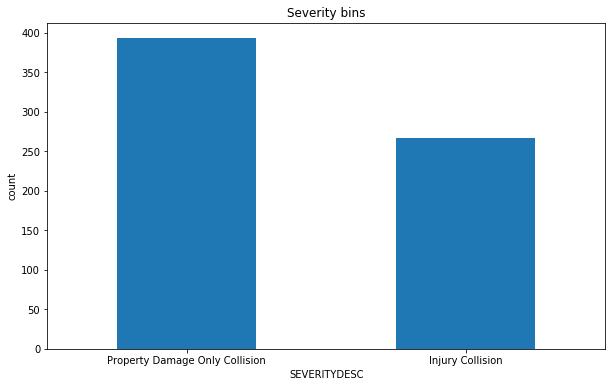

In [22]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

df_severity.plot(kind='bar',figsize=(10, 6))
plt.xticks(rotation=0)
plt.xlabel("SEVERITYDESC")
plt.ylabel("count")
plt.title("Severity bins")

In [23]:
collision_df.rename(columns={'X':'Longitude', 'Y': 'Latitude'}, inplace=True)
collision_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Longitude,Latitude,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYDESC
1320,-122.344947,47.720482,Driveway Junction,Y,N,Clear,Dry,Daylight,Y,Injury Collision
1572,-122.328913,47.613466,At Intersection (intersection related),Y,N,Clear,Dry,Daylight,Y,Property Damage Only Collision
2918,-122.374417,47.519289,Mid-Block (not related to intersection),Y,N,Clear,Dry,Daylight,Y,Injury Collision
3045,-122.358307,47.653110,Mid-Block (not related to intersection),Y,N,Snowing,Snow/Slush,Daylight,Y,Injury Collision
3517,-122.321917,47.595831,Mid-Block (not related to intersection),Y,N,Raining,Wet,Dark - Street Lights On,Y,Injury Collision


### Analysis <a name="analysis"></a>

Map of locations where colisions occured

In [24]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [25]:
lat_seattle = 47.6062
long_seattle = -122.3321

In [26]:
seattle_map = folium.Map(location=[lat_seattle,long_seattle], zoom_start=13)

In [27]:

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(collision_df['Latitude'], collision_df['Longitude']):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
seattle_map.add_child(incidents)

Junction type

In [28]:
df_junction = collision_df["JUNCTIONTYPE"].value_counts()
df_junction

Mid-Block (not related to intersection)              364
At Intersection (intersection related)               144
Mid-Block (but intersection related)                 116
Driveway Junction                                     21
At Intersection (but not related to intersection)     14
Ramp Junction                                          1
Name: JUNCTIONTYPE, dtype: int64

Text(0.5, 1.0, 'Junction Type Bins')

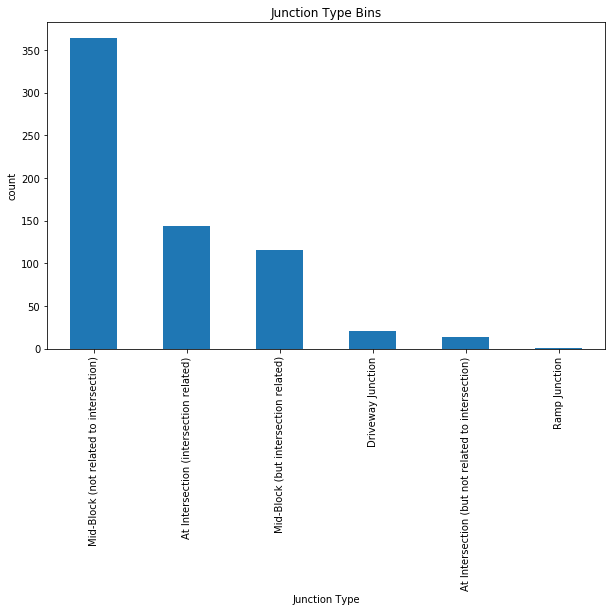

In [29]:
df_junction.plot(kind='bar',figsize=(10,6))
plt.xlabel("Junction Type")
plt.ylabel("count")
plt.title("Junction Type Bins")

According to bar chart Mid-Block (not related to intersection) & At Intersection (intersection related) couse more collisions.

In [30]:
df_inattention = collision_df["INATTENTIONIND"].value_counts()
df_inattention

Y    660
Name: INATTENTIONIND, dtype: int64

As we can see all of these collitions coused by inattention

In [35]:
df_druguse = collision_df["UNDERINFL"].value_counts()
df_druguse

N    429
0    176
Y     39
1     16
Name: UNDERINFL, dtype: int64

In [55]:
df_druguse.rename(index={'N': 'No', '0':'No','Y':'Yes','1':'Yes'}, inplace=True)
druguse_data = df_druguse['No'].sum(), df_druguse['Yes'].sum()
druguse_dataframe = pd.DataFrame(druguse_data,index=['No','Yes'])
druguse_dataframe

,0
No,605
Yes,55


Text(0.5, 1.0, 'Drug use Bins')

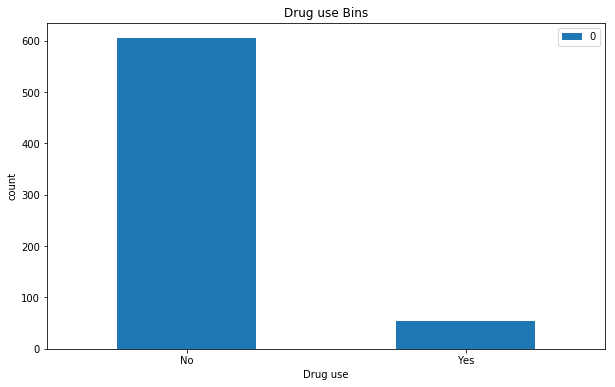

In [58]:
druguse_dataframe.plot(kind='bar',figsize=(10,6))
plt.xlabel("Drug use")
plt.xticks(rotation=0)
plt.ylabel("count")
plt.title("Drug use Bins")

It appiers to be there isnt much inpact of drug use for colitions in this dataset 

In [60]:
df_weather = collision_df["WEATHER"].value_counts()
df_weather

Clear                       331
Raining                     208
Overcast                    100
Snowing                       7
Unknown                       6
Fog/Smog/Smoke                5
Other                         2
Sleet/Hail/Freezing Rain      1
Name: WEATHER, dtype: int64

Text(0.5, 1.0, 'Weather Condition Bar Chart')

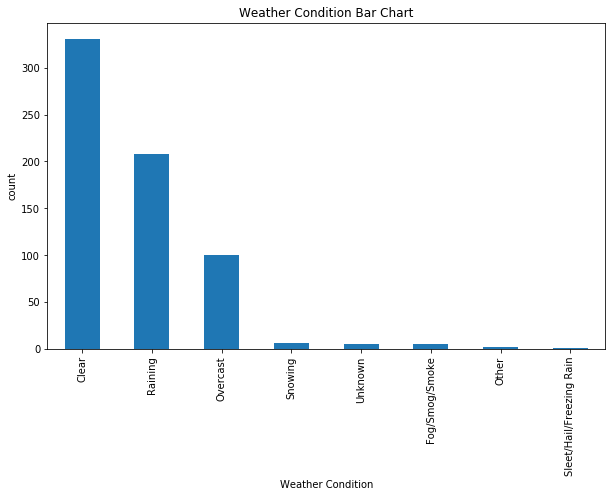

In [64]:
df_weather.plot(kind='bar',figsize=(10,6))
plt.xlabel("Weather Condition")
plt.ylabel("count")
plt.title("Weather Condition Bar Chart")

Most colitions occured in Clear & Raning weather conditions

In [65]:
df_road = collision_df["ROADCOND"].value_counts()
df_road

Dry               354
Wet               284
Ice                 7
Snow/Slush          7
Unknown             5
Standing Water      3
Name: ROADCOND, dtype: int64

Text(0.5, 1.0, 'Road Condition Bar Chart')

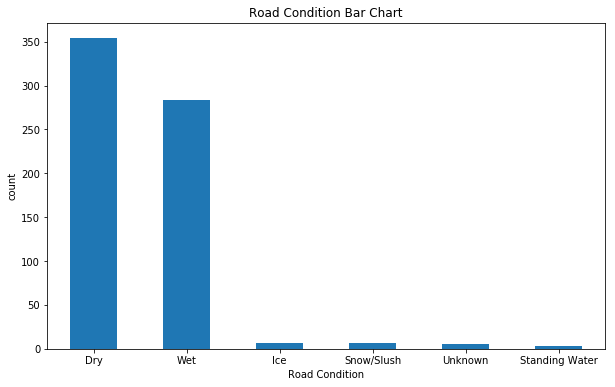

In [68]:
df_road.plot(kind='bar',figsize=(10,6))
plt.xlabel("Road Condition")
plt.xticks(rotation=0)
plt.ylabel("count")
plt.title("Road Condition Bar Chart")

Most colitions occured during Dry and Wet conditions

In [69]:
df_lightcondition = collision_df["LIGHTCOND"].value_counts()
df_lightcondition

Daylight                    378
Dark - Street Lights On     234
Dawn                         17
Dusk                         15
Dark - No Street Lights       8
Unknown                       4
Dark - Street Lights Off      3
Other                         1
Name: LIGHTCOND, dtype: int64

Text(0.5, 1.0, 'Light Condition Bar Chart')

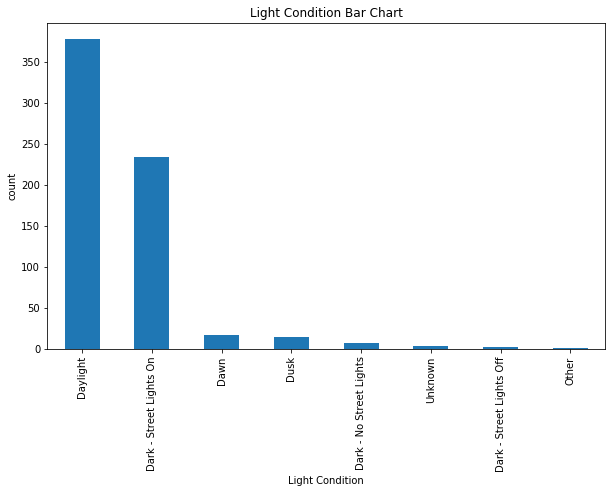

In [71]:
df_lightcondition.plot(kind='bar',figsize=(10,6))
plt.xlabel("Light Condition")
plt.ylabel("count")
plt.title("Light Condition Bar Chart")

Most colitions occured during Daylight and Dark-Street Lights On conditions

In [72]:
df_speeding = collision_df["SPEEDING"].value_counts()
df_speeding

Y    660
Name: SPEEDING, dtype: int64

All colitions coused by Speeding

## Results & Discussion <a name="results"></a>

When studing the colision distribution map we can see that most of cases occured in Mid-blocks. We have confirmed that using the Junction type vs collision count bar chart. During data analysis it cofirmed that all collitions have been occurd due to in-attention when driving. When we consider Drug use relationship with collisions it appiers to be there isnt much inpact of drug use for colitions in this dataset. Bad weather impact on colition is much less according to our annalysis becouse most of the collitions occured during Clear weather conditions and there is a impact by Rainy conditions for collitions occured in Seattle. Furthermore, when we consider Road coditions most of colitions occured during the dry and followed by wet road coditions which relates to Clear and Rainy weather conditions. When coparing light codition with colitions most of collisions occured during day light and followed by Dark and Street lights on condions rather than completly dark conditions. Speeding have coused all the colitions in the data set. 

## Conclution <a name="conclusion"></a>

All the colitions occured mainly due to Speeding and In-attention. Rather than bad Weather, Road and Light conditions most colitions occured in good conditions. It may suggest that in good driving conditions drivers pay less attention to driving and tend to speed. Also by taking necessory actions to notify drivers about the colision risk at Mid-block junctions which tend to reduce almost 50% of collsions. 